# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

### Link a GitHub

In [1]:
###

### Importacion de librerias

In [2]:
# Primero que nada importo las librerias, agrego date time por que voy a trabajar con series de tiempo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf 
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
# Creamos los distintos data set en funcion de los años, 2017,2018,2019 de manera separada
data_2019 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')

In [4]:
# Desglosamos la informacion para el año 2019
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [5]:
data_2019.shape

(1372645, 10)

Data 2019 tiene 1.372.645 registros y 10 columnas, tiene algunas columnas que son strings( object) como: Dia,Estacion,Sentido, tipo de vehiculo y forma de pago. Tambien es interesante observar que fecha esta tambien en formato object, python nativamente no interpreta que estamos usando fechas lo toma como string, entonces con datetime vamos a transformar ese string en un formato que python interprete como tiempo.

In [6]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [7]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


Data 2018 y 2017 tienen una estructura similiar a data_2019 por lo que el analisis y los argumentos son similares a los expuestos en data 2019

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']


In [9]:
data_2017["estacion"].value_counts()
data_2018["estacion"].value_counts()
data_2019["estacion"].value_counts()

Avellaneda            391842
Illia                 291900
Dellepiane Centro     180140
Dellepiane Liniers    176984
Alberdi               150583
Retiro                133584
Sarmiento              24231
Salguero               23381
Name: estacion, dtype: int64

In [10]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [11]:
data_2019['sentido'].value_counts()
data_2018['sentido'].value_counts()
data_2017['sentido'].value_counts()

Provincia    462729
Centro       349424
Name: sentido, dtype: int64

In [12]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [13]:
data_2019['tipo_vehiculo'].value_counts()
data_2018['tipo_vehiculo'].value_counts()
data_2017['tipo_vehiculo'].value_counts()

Liviano    479684
Pesado     332469
Name: tipo_vehiculo, dtype: int64

In [14]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']


In [15]:
data_2019['forma_pago'].value_counts()
data_2018['forma_pago'].value_counts()
data_2017['forma_pago'].value_counts()

TELEPASE           201388
EFECTIVO           149340
NO COBRADO         141280
EXENTO             132716
INFRACCION         111428
T. DISCAPACIDAD     76001
Name: forma_pago, dtype: int64

## Grafico con la informacion de estacion, sentido, tipo de vehiculo y forma de pago para los años 2017, 2018 y 2019

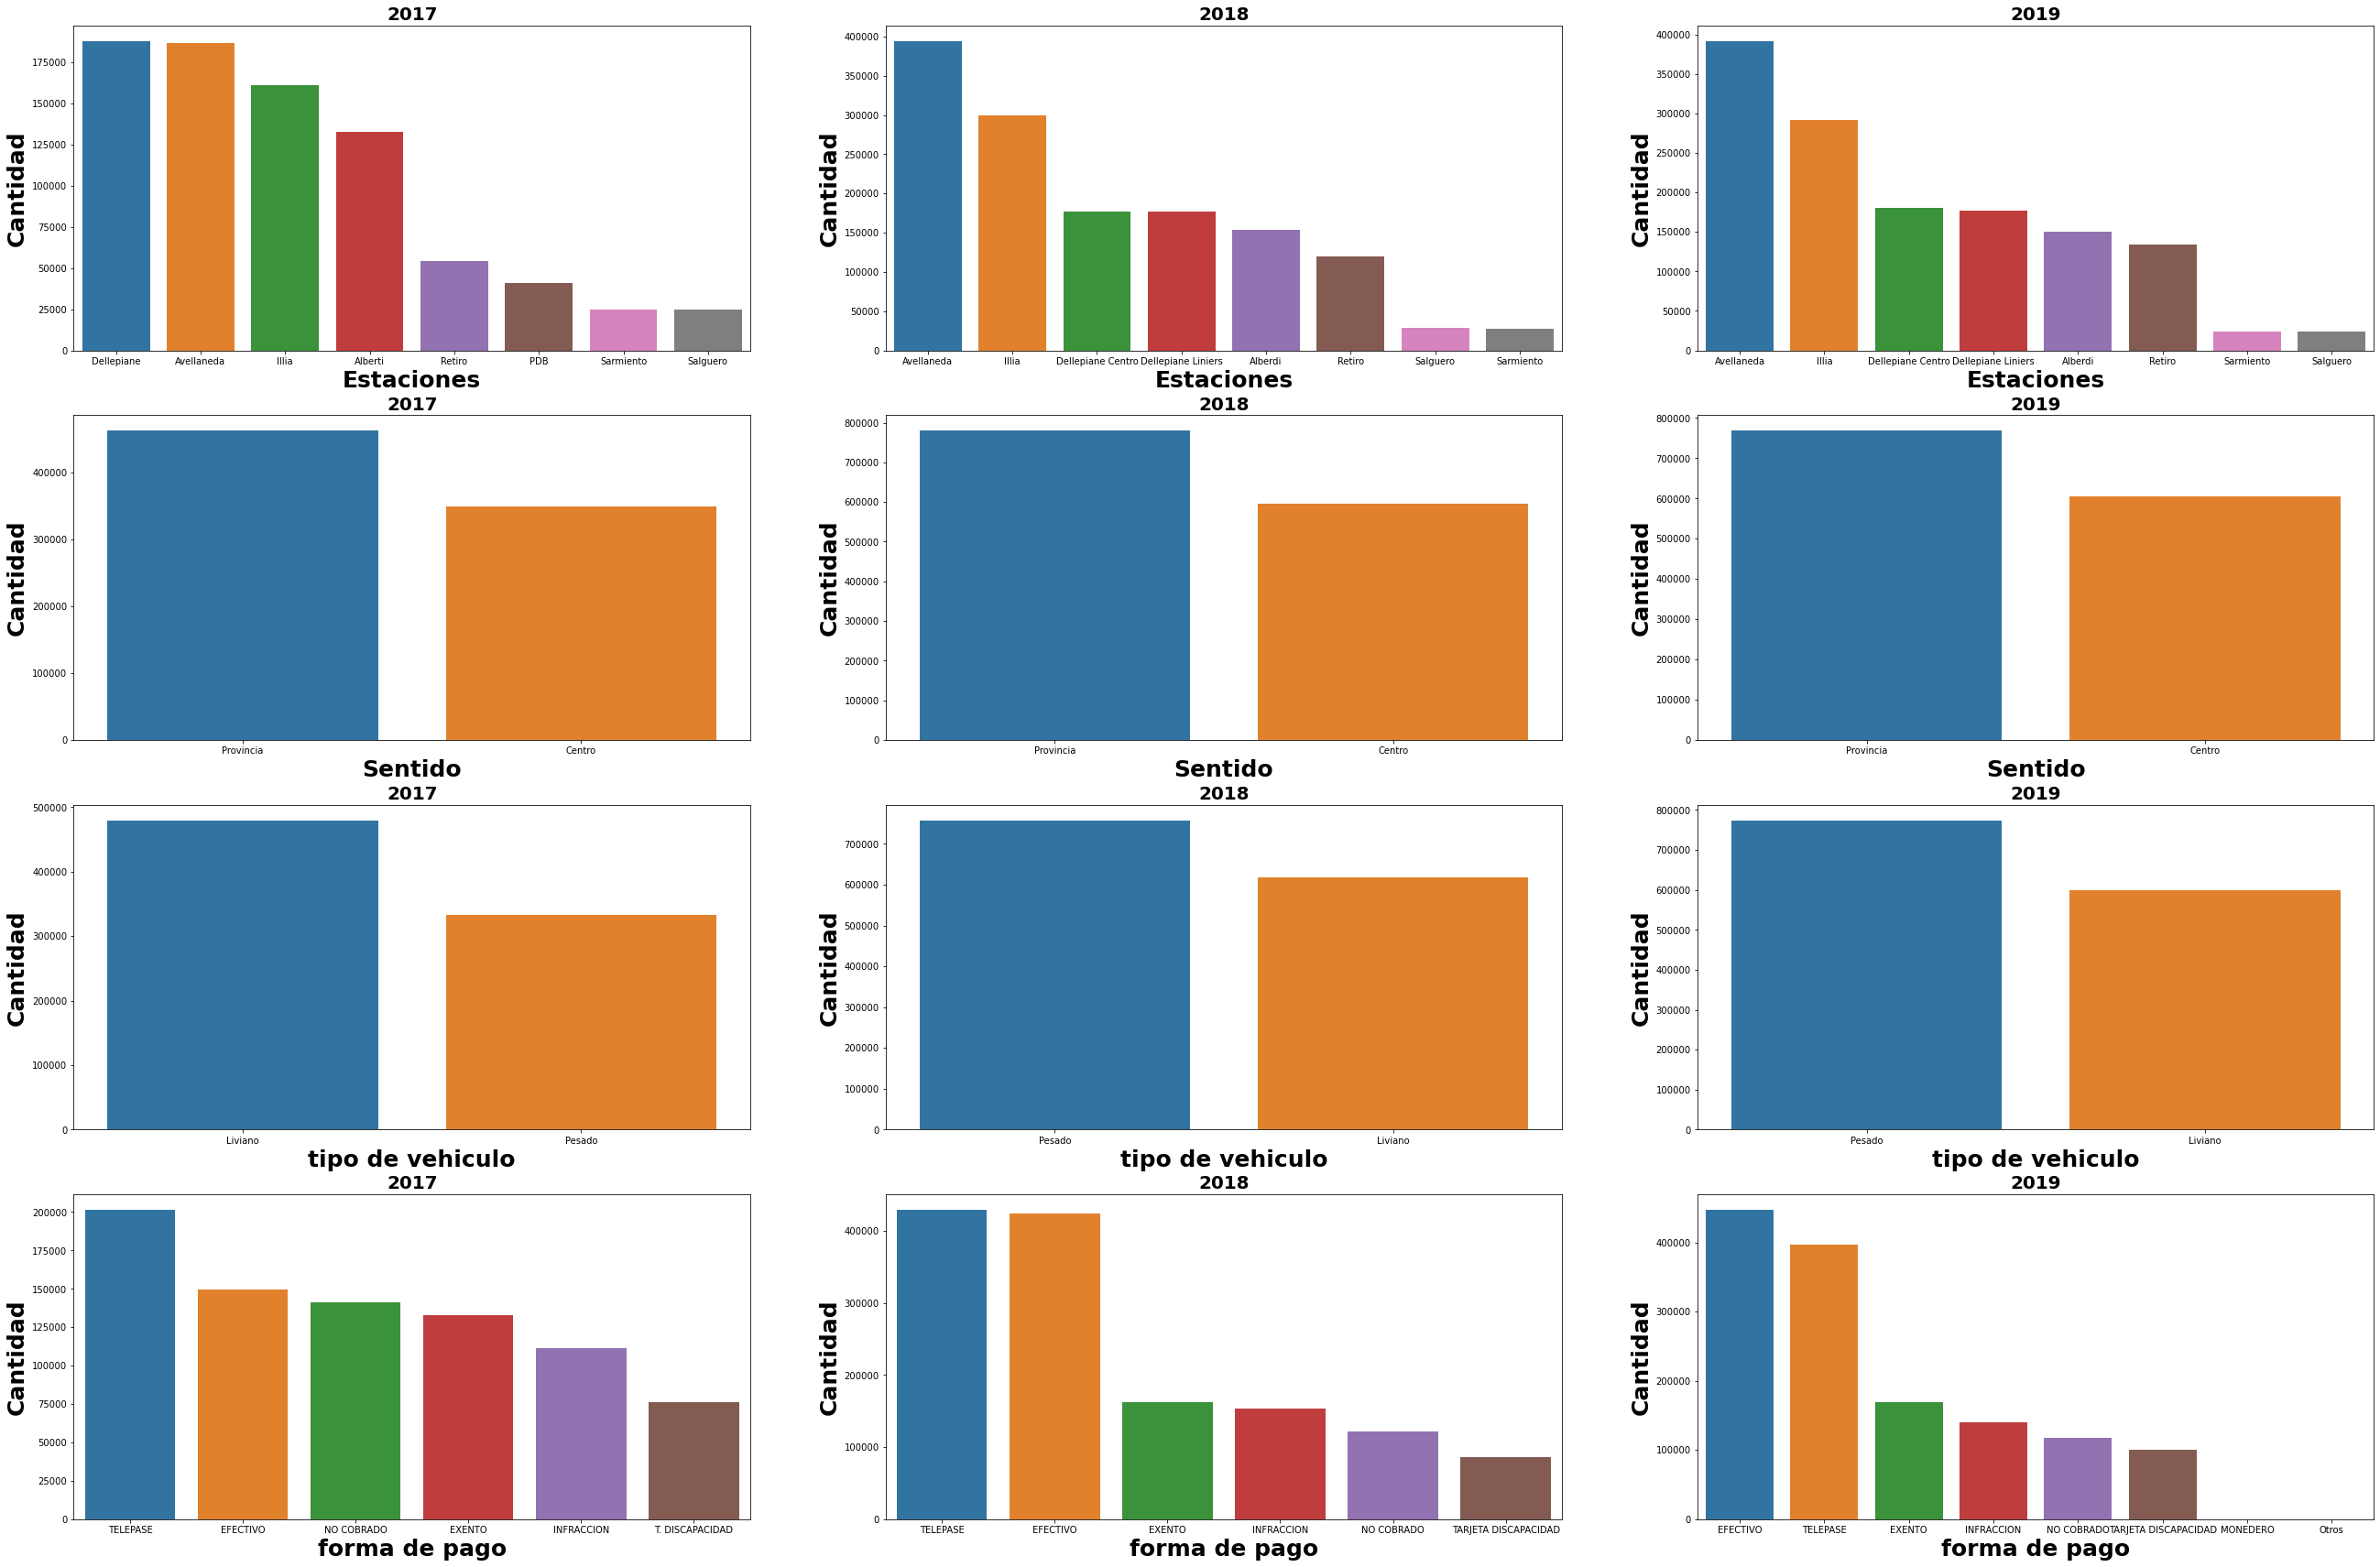

In [16]:
plt.figure(figsize = (45, 30))
           
plt.subplot(4,3,1)
sns.countplot(x="estacion", data=data_2017 , order=data_2017["estacion"].value_counts().index)
plt.title("2017" , fontweight = "black" , fontsize = 20)
plt.xlabel("Estaciones" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)

plt.subplot(4,3,2)
sns.countplot(x="estacion", data=data_2018 , order=data_2018["estacion"].value_counts().index)
plt.title("2018" , fontweight = "black" , fontsize = 20)
plt.xlabel("Estaciones" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)

plt.subplot(4,3,3)
sns.countplot(x="estacion", data=data_2019 , order=data_2019["estacion"].value_counts().index)
plt.title("2019" , fontweight = "black" , fontsize = 20)
plt.xlabel("Estaciones" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)

plt.subplot(4,3,4)
sns.countplot(x="sentido", data=data_2017 , order=data_2017["sentido"].value_counts().index)
plt.title("2017" , fontweight = "black" , fontsize = 20)
plt.xlabel("Sentido" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)
        
plt.subplot(4,3,5)
sns.countplot(x="sentido", data=data_2018 , order=data_2018["sentido"].value_counts().index)
plt.title("2018" , fontweight = "black" , fontsize = 20)
plt.xlabel("Sentido" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)


plt.subplot(4,3,6)
sns.countplot(x="sentido", data=data_2019 , order=data_2019["sentido"].value_counts().index)
plt.title("2019" , fontweight = "black" , fontsize = 20)
plt.xlabel("Sentido" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)
           
plt.subplot(4,3,7)
sns.countplot(x="tipo_vehiculo", data=data_2017 , order=data_2017["tipo_vehiculo"].value_counts().index)
plt.title("2017" , fontweight = "black" , fontsize = 20)
plt.xlabel("tipo de vehiculo" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)


plt.subplot(4,3,8)
sns.countplot(x="tipo_vehiculo", data=data_2018 , order=data_2018["tipo_vehiculo"].value_counts().index)
plt.title("2018" , fontweight = "black" , fontsize = 20)
plt.xlabel("tipo de vehiculo" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)


plt.subplot(4,3,9)
sns.countplot(x="tipo_vehiculo", data=data_2019 , order=data_2019["tipo_vehiculo"].value_counts().index)
plt.title("2019" , fontweight = "black" , fontsize = 20)
plt.xlabel("tipo de vehiculo" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)

plt.subplot(4,3,10)
sns.countplot(x="forma_pago", data=data_2017 , order=data_2017["forma_pago"].value_counts().index)
plt.title("2017" , fontweight = "black" , fontsize = 20)
plt.xlabel("forma de pago" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)


plt.subplot(4,3,11)
sns.countplot(x="forma_pago", data=data_2018 , order=data_2018["forma_pago"].value_counts().index)
plt.title("2018" , fontweight = "black" , fontsize = 20)
plt.xlabel("forma de pago" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)


plt.subplot(4,3,12)
sns.countplot(x="forma_pago", data=data_2019 , order=data_2019["forma_pago"].value_counts().index)
plt.title("2019" , fontweight = "black" , fontsize = 20)
plt.xlabel("forma de pago" , fontweight = "black" , fontsize = 25)
plt.ylabel("Cantidad" , fontweight = "black" , fontsize = 25)


plt.show()

Interpretacion del grafico: ( Tener en consideracion la escala en los ejes)
    
- Con respecto a estaciones, se que a medida que pasaron los 3 años, la estacion Avellaneda y la estacion Illia tomaron un rol preponderante siendo las que las veces aparecen en el año 2018 y 2019. Esto se explica en gran medida por la separacion de la estacion Dellepiane. Analizando los valores podemos ver que se paso de aproximadamente 175.000 a numeros superiores a los 300.000 

- Analizando el sentido en el uso de la autopista se ve como la cantidad de apariciones de provincia es superior a los valores de centro, esto indicaria que esta autopista el particular estaria siendo usada mas para salir del centro hacia el interior de la provincia que del interior al centro de la ciudad. Esta informacion hay que tomarla con cuidado, ya que estas cifras estan el totales anuales, pero puede ser que en ciertos momentos especificos la centro sea superior a provincia( por ejemplo para el año 2021 con el tema de la pandemia es esperable que centro haya superado a la ruta provincia, por el hecho de abastecimiento de alimentos y medicinas por ejemplo). Para el caso opuesto esta brecha emtre provincia y centro seria muy amplia en fechas simbolicas ( epoca de fiestas, vacaciones,etc). Guiandonos por los valores exclusivamente se observa un salto importante del año 2017 a 2018.

- En tipo de vehiculos podemos inferir que esta autopista paso de tener mas transito liviano(2017) a pesado en 2018 y 2019, estas cifras pueden servir para planificar el tema de mantenimiento de la autopista por ejemplo, ya que es de esperar que el desgaste y deterioro de la autopista sea mayor al tener mas cantidad de vehiculos pesados y sea necesario testinar mas presupuesto a esta autpoista.

- Desglosando las formas de pago para los 3 años se observa un aumento constante a traves de los años del pago en efectivo, en efecto para el año 2019 este supera incluso a telepase. Este dato es llamativo, pues cuando se filtra el dataset para la estacion Illia y pago en efectivo se observa una tendencia negativa en esta.

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


# PARTE A: Exploracion de datos 

## En esta seccion se realizaran las siguientes acciones: 

- Creacion del dataset basico ( concatenacion de los 3 años de datos, creacion de la columna de fecha en su correcto formato, filtrado de Illia y pago en efectivo) y grafico

- Como la grafica no permitia identificar bien los componentes de la serie realice diferentes resamples: semanal, mensual y trimestral esto con el fin de tener una mejor observacion del comportamiento de los datos. 

- Se detectan valores atipicos en la semanal, practicamente ninguno en la mensual y trimestral. Se reemplazan por nan los valores extremos y luego se realiza un interpolate para rellenar los nan.

- La proxima pregunta a responder es a que tipo de modelo se ajusta mejor la serie: aditivo o multiplicativo. Para responder a esta pregunta realice graficos de todos los modelos posibles: aditivo y multiplicativo para semanal, aditivo y multiplicativo para mensual , aditivo y multiplicativo trimestral.

- Cada descomposicion muestra el comportamiento de los errores, ya ahi se vuelve intuir que la serie no es multiplicativa por que los valores de los errores estan en torno a 1 ( cuando lo deseable es que esten en torno a 0 y sin un comportamiento determinado) por lo que los modelos multiplicativos quedan descartados.

- Realice una figura con los distintos histogramas de los errores, con el fin de poder definir cual es el mejor modelo. En este caso la granularidad semanal es la elegida para continuar con el proyecto ( en las celdas siguientes se argumenta y justifica su eleccion)

- Se realiza un primer modelo benchmark muy simple de regresion lineal, tambien otro modelo de media movil con una ventana de 4 semanas y se realiza una comparativa de como ambas estan bastante lejos de representar correctamente la serie. Para tener mayor precision de la aproximacion de los modelos realizo el calculo de RMSE a lo largo de la serie

In [17]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
# realizamos una concatenacion de los 3 dataset
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
1750,2017-01-01,1,Domingo,Centro,Liviano,1
1755,2017-01-01,2,Domingo,Centro,Liviano,10
1757,2017-01-01,2,Domingo,Centro,Liviano,783
1761,2017-01-01,2,Domingo,Centro,Pesado,3
1764,2017-01-01,3,Domingo,Centro,Liviano,14


In [18]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
1750,Domingo,Centro,Liviano,1,2017-01-01 01:00:00
1755,Domingo,Centro,Liviano,10,2017-01-01 02:00:00
1757,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
1761,Domingo,Centro,Pesado,3,2017-01-01 02:00:00
1764,Domingo,Centro,Liviano,14,2017-01-01 03:00:00


In [19]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
1750,Domingo,Centro,Liviano,1,2017-01-01 01:00:00
1755,Domingo,Centro,Liviano,10,2017-01-01 02:00:00
1757,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
1761,Domingo,Centro,Pesado,3,2017-01-01 02:00:00
1764,Domingo,Centro,Liviano,14,2017-01-01 03:00:00


In [20]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
2,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
3,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
4,Domingo,Centro,Liviano,23,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Centro,Pesado,2,2019-12-31 22:00:00
238865,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238866,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [21]:
# El dataset de la estacion Illia y pago en efectivo contiene 238869 filas y 5 columnas para los 3 años
dataset.shape

(238869, 5)

In [22]:
# Con dtypes se ve que la columna fecha esta en formato deseado para trabajar
dataset.dtypes

dia                       object
sentido                   object
tipo_vehiculo             object
cantidad_pasos             int64
fecha             datetime64[ns]
dtype: object

Vemos ahora como la columna fecha tiene formato datetime lo cual esta bien para poder trabajarla como serie de tiempo. Por otro lado la variable de interes es cantidad de pasos que como vemos es un valor entero ( basicamente por que mide cantidad de autos y son numeros naturales) por lo tanto a nivel naturaleza de las variables tenemos lo necesario para empezar a indagar sobre la serie.

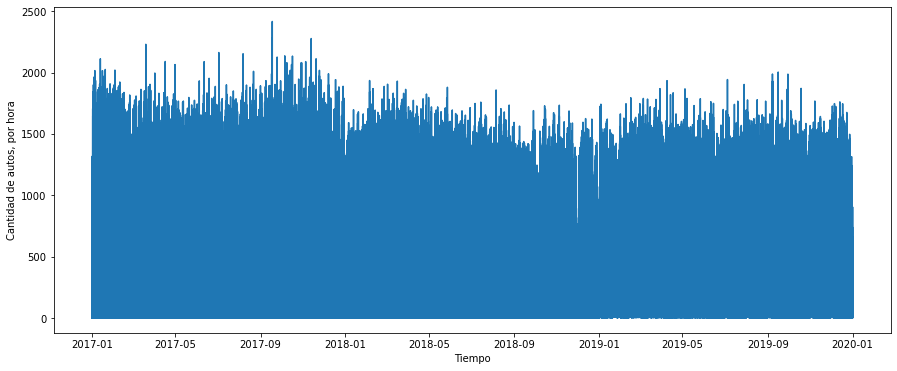

In [23]:
#Graficamos nuestros datos, tal como están
# En este caso tenemos un plot que vincula la columna fecha. En este caso es muy dificil poder 
# argumentar o tener una idea de como se comporta la serie.
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Como el grafico anterior no nos permite identificar el comportamiento de la serie vamos a tratar de hacer un agrupamiento(granularidad) de las fechas, esto con el fin de hacer un zoom sobre los datos y poder identificar mejor su comportamiento.
Las granularidades que decidi elegir fueron: semanal,mensual y trimestral

### Granularidad semanal

In [24]:
# Resampleo en funcion de las semanas
semanal = dataset.resample('W' , on = 'fecha').sum() 
semanal = semanal.loc[(semanal.index > '2017-01-01')]    # elimino la primera fila del dataset
semanal = semanal.loc[(semanal.index < '2020-01-05')]    # elimino la ultima fila del dataset 
print(semanal.shape)
semanal.head()

(156, 1)


,cantidad_pasos
fecha,
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
2017-02-05,359401


La justificacion para eliminar el primer valor de la serie es que no tiene en cuenta el valor de TODA la semana sino de solo una fraccion de esta, por lo tanto queda un valor bajisimo que podria llegar a confundirse con un outlier, para evitar esto directamente elimino la fila y los datos empiezan desde el 8 de enero de 2017

Con respecto a la decision de eliminar la ultima fila, la razon es que reproduce el valor exacto de la semana anterior, esto a la hora de realizar un entrenamiento y realizar el forecast puede generar inconvenientes.

Text(0.5, 1.0, 'Semanal')

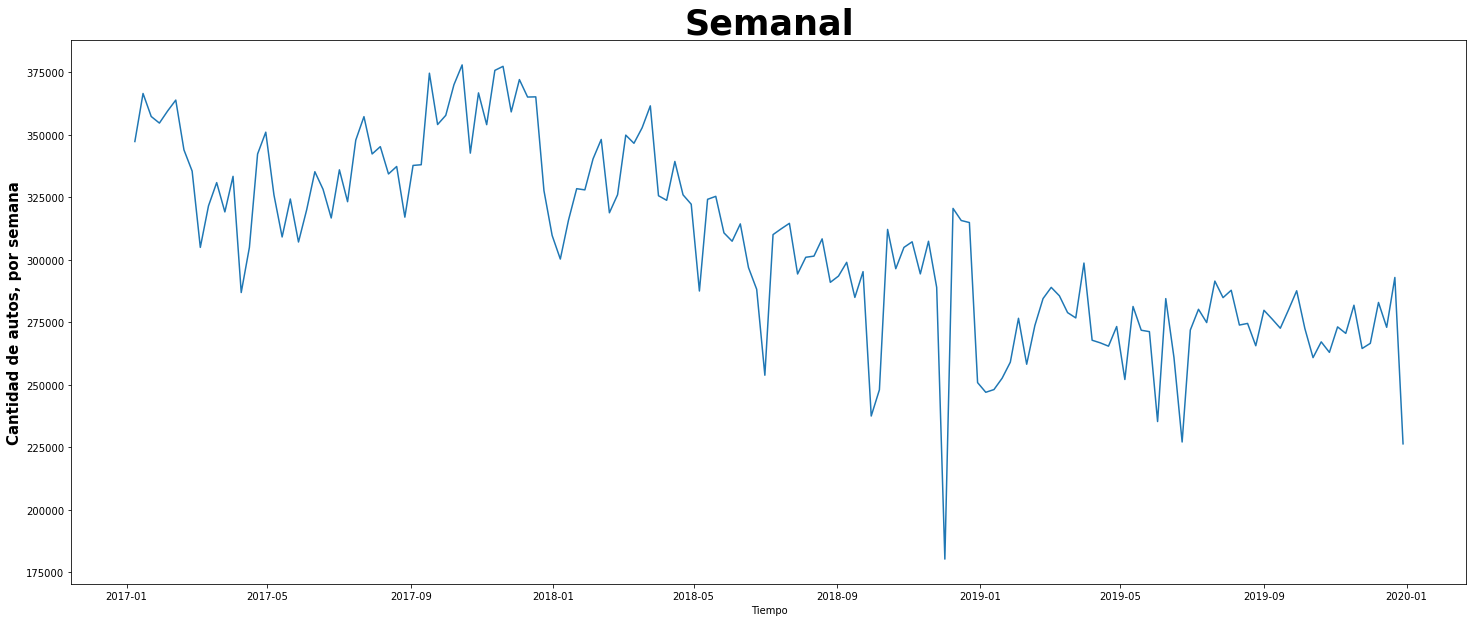

In [25]:
plt.figure(figsize=(25,10))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana' , fontweight = "black" , fontsize = 15)
plt.title("Semanal" , fontweight = "black" , fontsize = 35)

### Eliminacion de valores atipicos semanales:

In [26]:
semanal.cantidad_pasos[semanal.cantidad_pasos < 230000] = np.nan

In [27]:
print(semanal.isna().sum())
semanal = semanal.interpolate()
print(semanal.isna().sum())

cantidad_pasos    3
dtype: int64
cantidad_pasos    0
dtype: int64


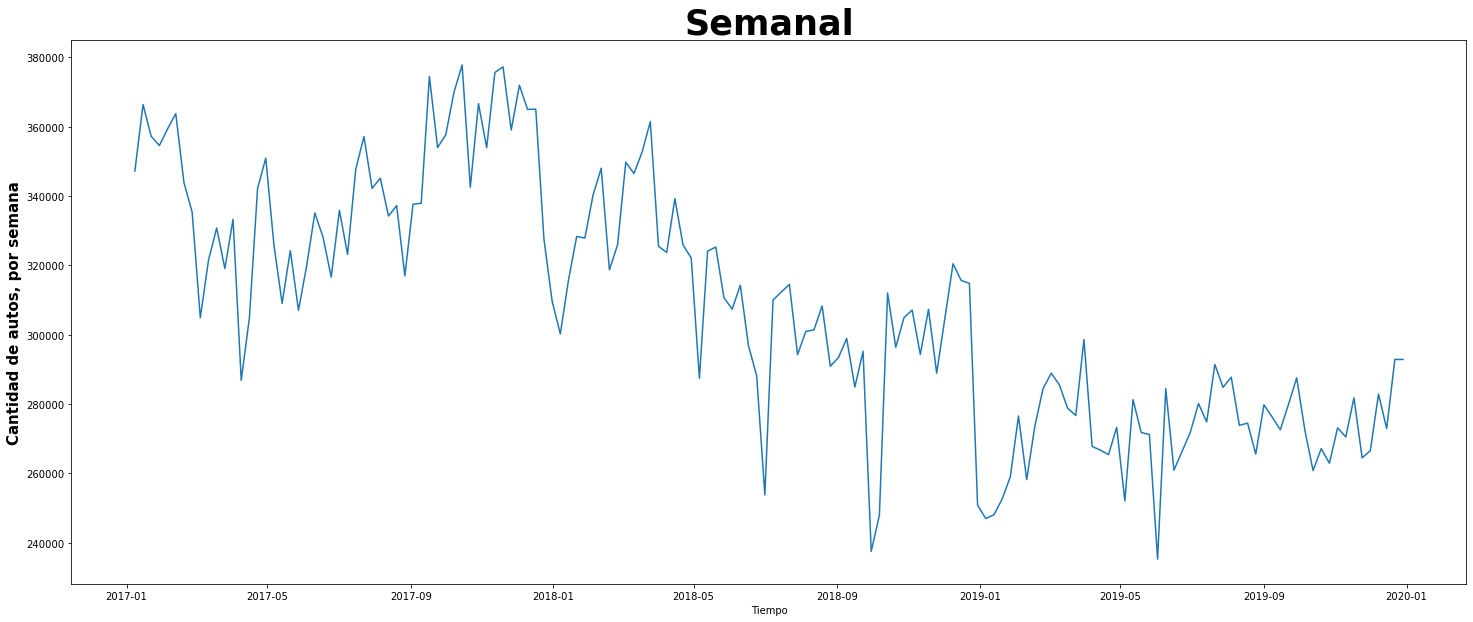

In [28]:
plt.figure(figsize=(25,10))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana' , fontweight = "black" , fontsize = 15)
plt.title("Semanal" , fontweight = "black" , fontsize = 35)

plt.show()

La serie semanal una vez eliminado los 3 valores atipicos presenta una tendencia negativa, como los valores estan dentro de los valores que considero normales voy a usar esta serie como base para ir armando las granularidades superiores, para eso y para no afectar la serie semanal original voy a crear una copia y usarla como base.

Voy a crear una copia de semanal con el indice reseteado, por que va a ser el insumo que mas adelante voy a usar en las diferentes granularidades

In [29]:
semanal2 = semanal.copy()
semanal2.reset_index(inplace=True)
semanal2.head()

,fecha,cantidad_pasos
0,2017-01-08,347212.0
1,2017-01-15,366413.0
2,2017-01-22,357215.0
3,2017-01-29,354581.0
4,2017-02-05,359401.0


### Granularidad mensual

In [30]:
mensual = semanal2.resample('M' , on = 'fecha').sum()
print(mensual.shape)
mensual.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1425421.0
2017-02-28,1402447.0
2017-03-31,1276279.0
2017-04-30,1618242.0
2017-05-31,1266241.0


### Granularidad trimestral

In [31]:
trimestral = semanal2.resample('Q' , on = 'fecha').sum()
print(trimestral.shape)
trimestral.head()

(12, 1)


,cantidad_pasos
fecha,
2017-03-31,4104147.0
2017-06-30,4184340.0
2017-09-30,4443975.0
2017-12-31,5019867.0
2018-03-31,4015738.0


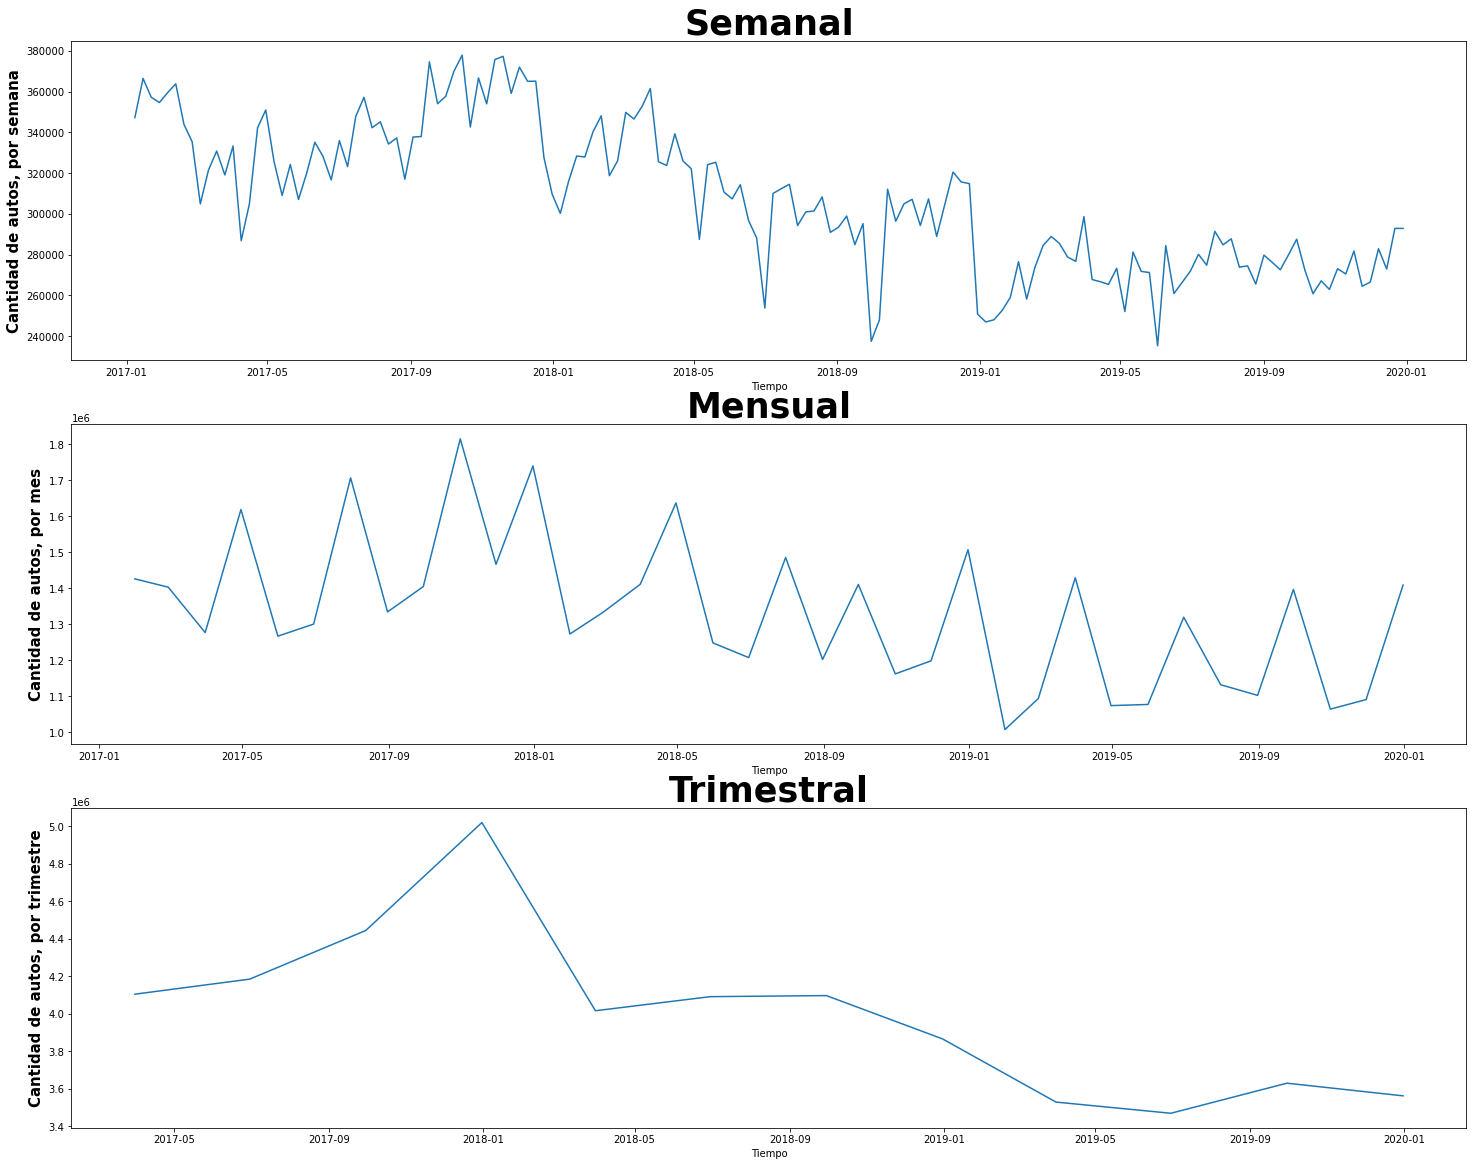

In [32]:
# Grafico en un mismo grafico las 3 distintas 
plt.figure(figsize=(25,20))

plt.subplot(3,1,1)
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana' , fontweight = "black" , fontsize = 15)
plt.title("Semanal" , fontweight = "black" , fontsize = 35)

plt.subplot(3,1,2)
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes' , fontweight = "black" , fontsize = 15)
plt.title("Mensual" , fontweight = "black" , fontsize = 35)

plt.subplot(3,1,3)
plt.plot(trimestral.index, trimestral.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por trimestre' , fontweight = "black" , fontsize = 15)
plt.title("Trimestral" , fontweight = "black" , fontsize = 35)

plt.show()

## Interpretacion del comportamiento de la serie:

¿Por que se hacen distintos resampleos ( granularidades)? La idea es tratar de encontrar un valor en el cual seamos capaces de observar el comportamiento de la serie a lo largo de los 3 años, como vimos con los valores originales era muy dificil poder decir algo sobre como se comporta la serie ( Si tiene tendencia, si es aditiva o multiplicativa). Realice 3 tipos de resampleos diferentes primero semanal, es decir pasamos el dataset original a valores por semana. Luego un resampleo por mes y finalmente por trimestre.


¿Que se puede decir de la serie? 

Guiandonos por el comportamiento tanto semanal,mensual y trimestral pareciera reflejar una disminucion de la cantidad de autos por la autopista Illia que realizan el pago en efectivo ( que son las condiciones por las cuales se filtro el dataset). Por lo tanto la serie pareciera tener una tendencia negativa.Esto es llamativo ya que en el analisis exploratio vimos que la cantidad de valores en efectivo iba en aumento a nivel global.  
Otro aspecto llamativo a tener en cuenta es que en todos los casos se observa un "pico" a finales del año 2017 y principios de 2018. 

La forma de los datos mensuales y trimestrales estan intimamente ligados a los datos semanales limpiados, es por eso que tienen un comportamiento bastante regular y no presentan valores atipicos que requieran algun tipo de modificacion.

Siguiente paso:  A cada granularidad le voy a aplicar un modelo aditivo( el modelo multiplicativo esta descartado por 2 argumentos, el primero es que la serie no tiene comportamiento expansivo a traves del tiempo y segundo realice un analisis de descomposicion y en todos los casos los errores me daban en torno a 1) con seasonal decompose voy a poder separar la tendencia, estacionalidad y la distribucion de los errores. 

Habiendo hecho esto voy a poder determinar cual va a ser la mejor granularidad dado el modelo aditivo. 

### Semanal, modelo aditivo

In [33]:
result_semanal_aditivo = seasonal_decompose(semanal.cantidad_pasos, model='additive')

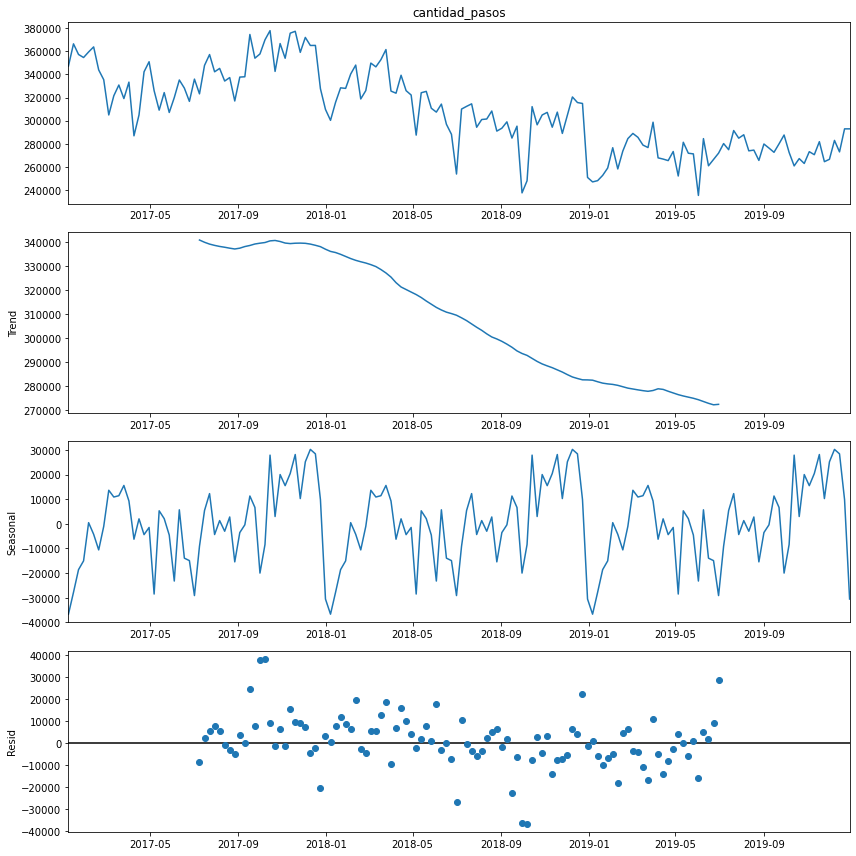

In [34]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result_semanal_aditivo.plot()
plt.show()

In [35]:
# Exposicion de los residuos como vector
result_semanal_aditivo.resid

fecha
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
2017-02-05   NaN
              ..
2019-12-01   NaN
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
Freq: W-SUN, Name: resid, Length: 156, dtype: float64

### Mensual, aditivo

In [36]:
result_mensual_aditivo = seasonal_decompose(mensual.cantidad_pasos, model='additive')

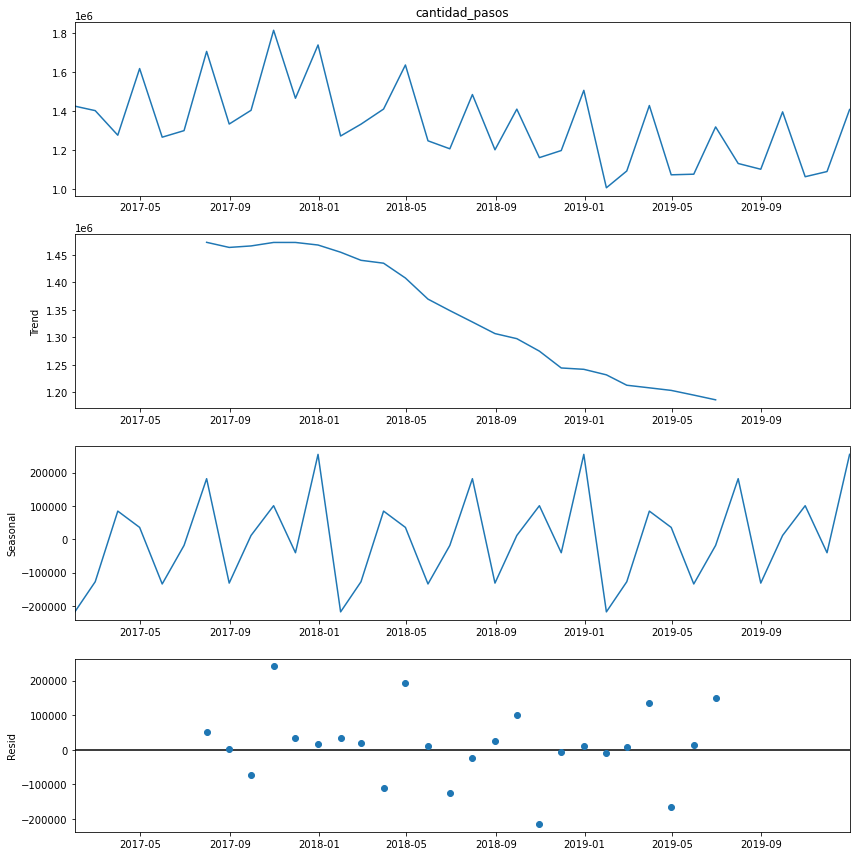

In [37]:
matplotlib.rcParams['figure.figsize'] = [12,12]
result_mensual_aditivo.plot()
plt.show()

In [38]:
result_mensual_aditivo.resid

fecha
2017-01-31              NaN
2017-02-28              NaN
2017-03-31              NaN
2017-04-30              NaN
2017-05-31              NaN
2017-06-30              NaN
2017-07-31     51663.007813
2017-08-31      1137.632813
2017-09-30    -73793.513021
2017-10-31    241260.111979
2017-11-30     33407.924479
2017-12-31     16818.539063
2018-01-31     34726.403646
2018-02-28     19929.403646
2018-03-31   -108983.429687
2018-04-30    192942.986979
2018-05-31     11778.111979
2018-06-30   -123817.242187
2018-07-31    -24636.950521
2018-08-31     25888.424479
2018-09-30    100819.570313
2018-10-31   -214234.054688
2018-11-30     -6381.867188
2018-12-31     10207.518229
2019-01-31     -7700.346354
2019-02-28      7096.653646
2019-03-31    136009.486979
2019-04-30   -165916.929687
2019-05-31     15247.945313
2019-06-30    150843.299479
2019-07-31              NaN
2019-08-31              NaN
2019-09-30              NaN
2019-10-31              NaN
2019-11-30              NaN
2019-12-31    

### Trimestral modelo aditivo

In [39]:
result_trimestral_aditivo = seasonal_decompose(trimestral.cantidad_pasos, model='additive')

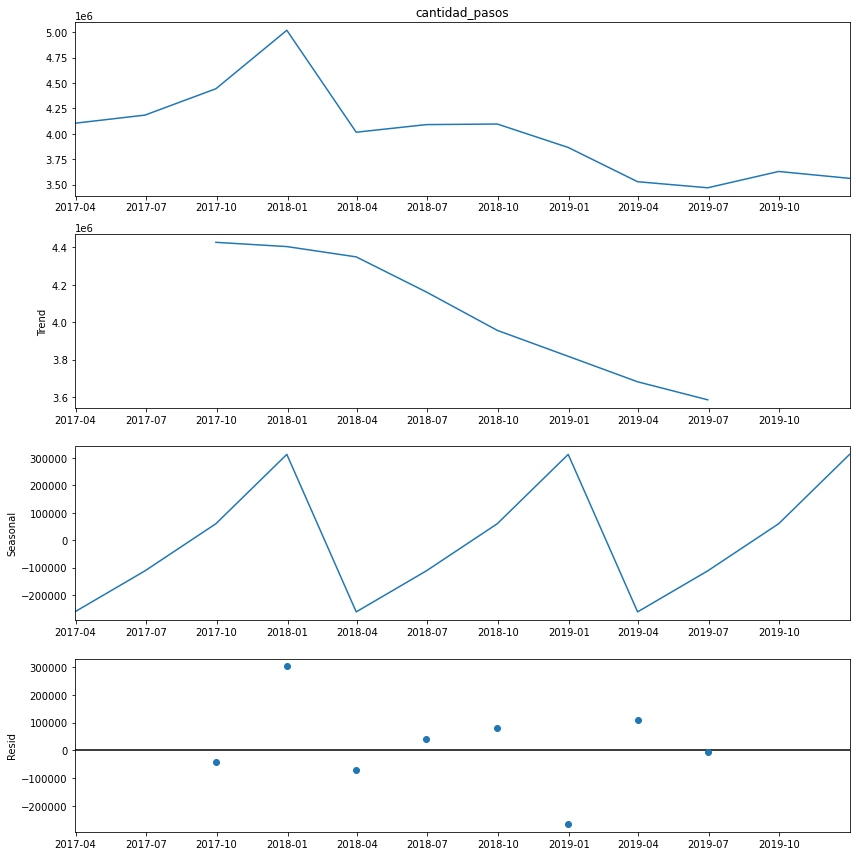

In [40]:
matplotlib.rcParams['figure.figsize'] = [12,12]
result_trimestral_aditivo.plot()
plt.show()

### Interpretacion de la descomposicion: 

Los 3 tipos de granularidades fueron estudiados bajo el modelo aditivo. Para dar respuesta a cual es la mejor granularidad tengo que comparar los errores.

- Errores en las distintas granularidades: En este caso para los 3 tipos de granularidad los errores estan en torno a 0, lo cual es uno de los requisitos para seleccionar un buen modelo. Sin embargo en el modelo trimestral aditivo se puede ver un leve comportamiento en los errores por lo tanto queda descartado. Entre el modelo mensual y el semanal me quedo con el que tenga el mejor rango de errores posible, en este caso seria el semanal.



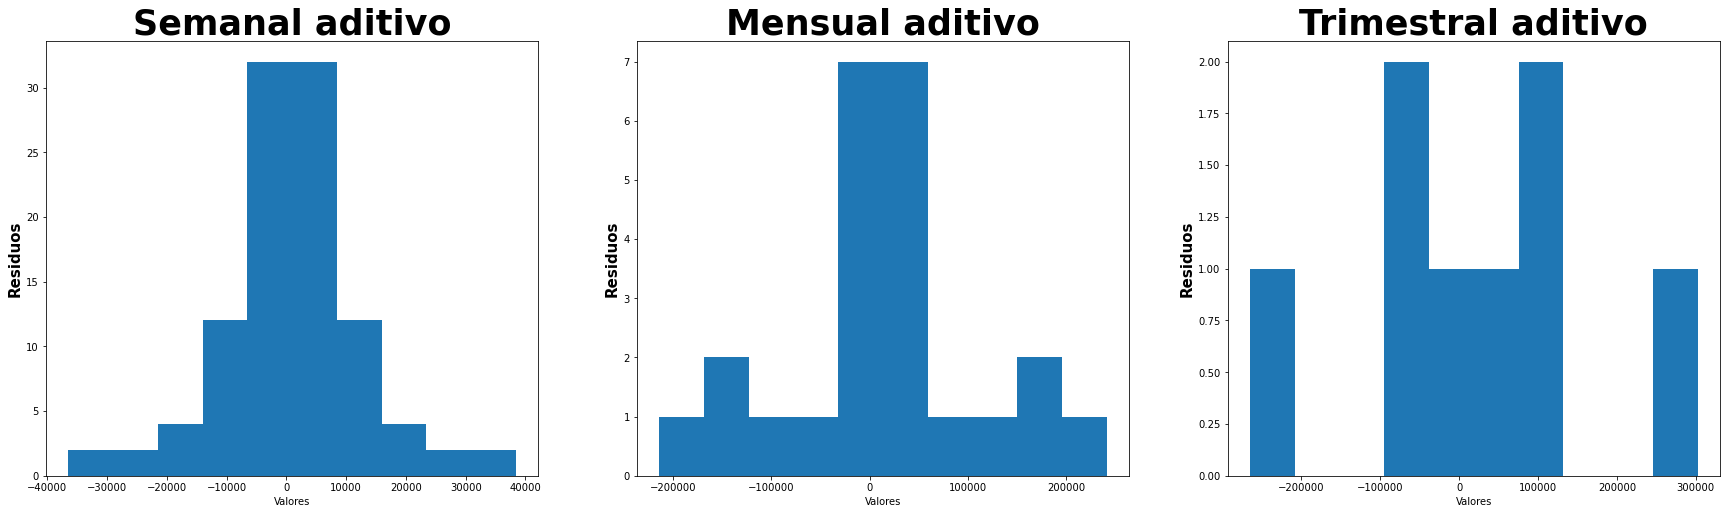

In [41]:
plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
plt.hist(result_semanal_aditivo.resid)
plt.xlabel('Valores')
plt.ylabel('Residuos' , fontweight = "black" , fontsize = 15)
plt.title("Semanal aditivo" , fontweight = "black" , fontsize = 35)


plt.subplot(1,3,2)
plt.hist(result_mensual_aditivo.resid)
plt.xlabel('Valores')
plt.ylabel('Residuos' , fontweight = "black" , fontsize = 15)
plt.title("Mensual aditivo" , fontweight = "black" , fontsize = 35)

plt.subplot(1,3,3)
plt.hist(result_trimestral_aditivo.resid)
plt.xlabel('Valores')
plt.ylabel('Residuos' , fontweight = "black" , fontsize = 15)
plt.title("Trimestral aditivo" , fontweight = "black" , fontsize = 35)


plt.show()


## Interpretacion histograma de errores:

La granularidad semanal y mensual tienen un comportamiento bastante bueno. No es posible hacer una comparacion de manera directa por que las unidades de medida no son compatibles asi que de manera arbitraria voy a tomar los residuos semanales como buenos.

# Conclusion: 

Gracias a todo lo expuesto hasta este momento voy a decidir usar como granularidad semanal, a su vez el modelo aditivo se ajusta mejor a los datos. Haciendo un analisis de la serie, podria descomponerla y explicarla como:

* Tendencia: Tiene un componente tendencial, que tiene un comportamiento decreciente ( pendiente negativa)

* Estacionalidad: Pareciera tener un comportamiento ciclico que se repite mas o menos cada 12 meses( aun cuando la serie semanal presenta diferentes valores).

* Residuo : El residuo es la diferencia entre la serie original, tendencia y estacionalidad. En este caso los residuos tiene un comportamiento de ruido blanco, los valores estan en torno a 0 con una distribucion parecida a la normal sin un comportamiento determinado.

### Media Movil

Es una forma de captar la tendencia de una serie, basicamente el metodo de media movil toma una ventana ( en este caso seria de x cantidad de dias) y le calcula el promedio. Asi va uniendo los diferentes promedios de las ventanas y con eso va formando la tendencia.

Para elegir mejor la amplitud de la ventana tengo que tener en cuenta los datos, el dataset esta compuesto por 1095 registros ( que serian 365 dias de cada año por 3 años)

In [42]:
ventana = 4         # Selecciono 4 semanas(un mes), fui probando con diferentes valores hasta decidir quedarme con 4

semanal_prom_tend = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_prom_tend      
 

fecha
2017-01-08          NaN
2017-01-15          NaN
2017-01-22    356355.25
2017-01-29    359402.50
2017-02-05    358742.75
                ...    
2019-12-01    273934.00
2019-12-08    271726.50
2019-12-15    278821.75
2019-12-22    285403.25
2019-12-29          NaN
Freq: W-SUN, Name: cantidad_pasos, Length: 156, dtype: float64

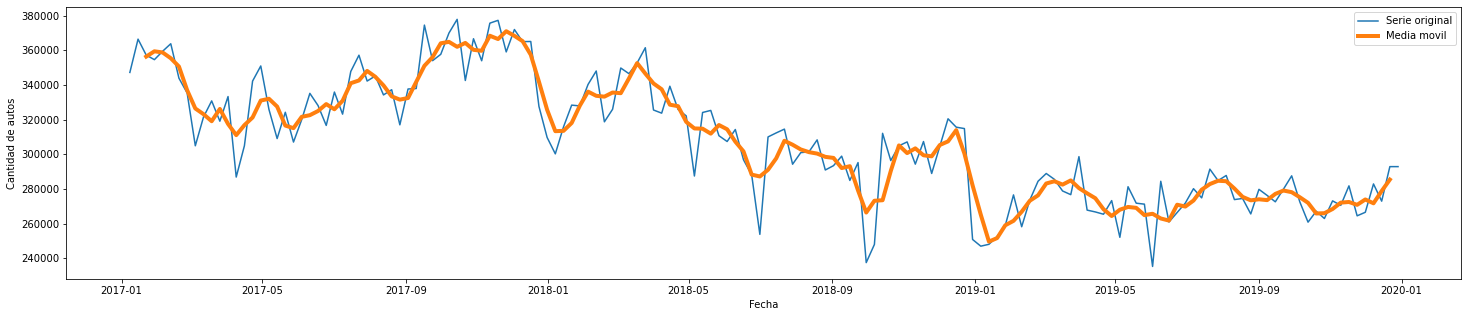

In [43]:
# Comparo los valores de la serie original con los predichos por el metodo de media movil
plt.figure(figsize = (25,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Serie original')
plt.plot(semanal_prom_tend, lw = 4, label = 'Media movil')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos')
plt.legend()
plt.show()

Probando con diferentes valores de ventana puedo concluir que a medida que se reduce el valor de la ventana el promedio tendencia se acerca mucho a la serie, es decir son series con media movil importante. Si bien a medida que aumento la ventana baja la precision decidi seleccionar el valor de 4 semanas ( un mes) como valor final de ventana.

Podria realizar un grafico con las diferencias entre la serie original y la Media movil:

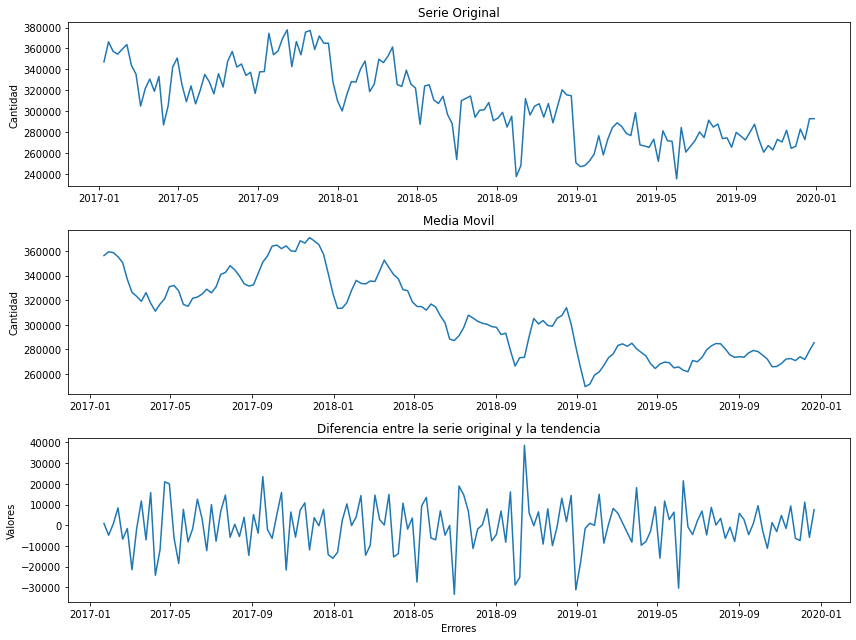

In [44]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.ylabel('Cantidad')

plt.subplot(3,1,2)
plt.title('Media Movil')
plt.plot(semanal_prom_tend)
plt.ylabel('Cantidad')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(semanal.index, semanal.cantidad_pasos - semanal_prom_tend)
plt.xlabel('Errores')
plt.ylabel('Valores')

plt.tight_layout()
plt.show()

Como conclusion podria decir que la aproximacion por Media Movil permite tener una idea general del tema tendencia, es muy util para captar este componente( esto se puede confirmar con el grafico de arriba que muestra el comportamiento de la diferencia entre la serie original y la tendencia ). 

### Modelo lineal: 

Es muy comun que a una serie de tiempo (sin modificar el dataset) se le aplique una regresion lineal para tratar de describir su comportamiento, el principal problema de esto es primero el supuesto de linealidad de la regresion, los datos como se observa en el grafico superior no parecen tener una tendencia lineal, esto tiene que ver con que la serie al tratarte de una misma variable en muchos casos no son independientes entre si las observaciones ( supuesto de la regresion lineal tradicional) esta relacion de las observaciones provoca que un modelo de regresion lineal tradicional aplicado al data set como viene puede entregar resultados malos.

### Regresion lineal con dataset original

La regresion lineal no entiende en formato fecha, entonces lo primero que habria que hacer es transformar las fechas el valores.

In [45]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
semanal.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-08,347212.0,736337
2017-01-15,366413.0,736344
2017-01-22,357215.0,736351
2017-01-29,354581.0,736358
2017-02-05,359401.0,736365


In [46]:
# Instancio el objeto y lo entreno
lr = LinearRegression()
lr.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.cantidad_pasos) # x_train y_train

LinearRegression()

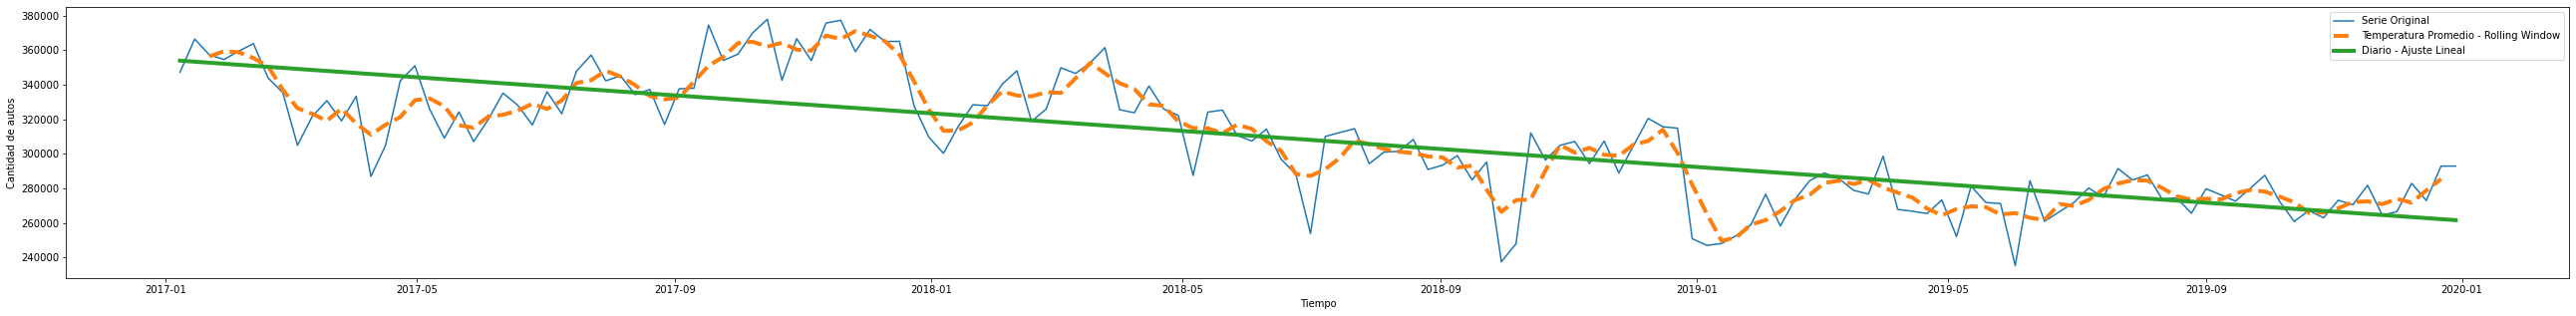

In [47]:
plt.figure(figsize = (45,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Serie Original')
plt.plot(semanal_prom_tend, ls = '--', lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.plot(semanal.index, lr.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Diario - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.legend()
plt.show()

Este grafico, junto con el argumento de la NO independencia de las distintas observaciones nos da lugar a preguntarnos como podemos hacer entonces para poder realizar buenas estimaciones y entrenar buenos modelos.
La idea va a ser ahora pasar a la parte 2 que es el entrenamiento de modelos, en estos voy a crear un nuevo dataset con las caracteristicas y requisitos necesarios de los modelos vistos en el sprint 2 y ahi si poder crear buenos modelos

# Seleccion de metrica:

Durante este proyecto numero tres al igual que con los dos anteriores voy a seleccionar el RMSE como metrica de evaluacion.
Basicamente el RMSE toma las diferencias entre los valores predichos por el modelo y las variables observadas. 

RMSE = [(1/N)* sumatorio ( Yi(original) - yi(predicho))2]**1/2

## Calculo del RMSE de regresion lineal como primer aproximacion:

### Modelo de regresion lineal

In [48]:
rmse_reg = np.sqrt(mean_squared_error(semanal.cantidad_pasos ,lr.predict(semanal.fecha_numeros.values.reshape(-1, 1))))

print(f'El RMSE de la regresion lineal es: {rmse_reg}')


El RMSE de la regresion lineal es: 22083.569021026782


Este valor de error va a ser nuestro punto de partida. El dataset aun no fue modificado, entonces tenemos que esperar mejorias cuando se hagan las modificaciones del dataset. Una vez creado el nuevo dataset de trabajo voy a realizar nuevamente una regresion lineal y calcularle el error. Ese va a ser el modelo Benchmark a superar por modelos mas complejos.

Entonces recapitulando, en la primera parte hice un analisis del dataset y sus elementos, tome la serie y le calcule una regresion lineal que obtuvo un error de 22083. Lo que voy a hacer en la parte B es transformar esa serie en una matriz, con filas y columnas que son los mismo datos de la serie desplazados un periodo, y a cada fila le voy a calcular un valor final que luego se va agregando en la fila siguiente y asi sucesivamente, esto con el fin de mejorar las estimaciones y el entreamiento del modelo.

# Pregunta original

Como vimos en el analisis exploratorio las estaciones mas grandes son Illia y Avellaneda. Tambien vimos en el grafico de todas las series que el metodo de pago efectivo fue en aumento, cosa que no coincide con el comportamiento en la serie Illia, entonces la pregunta original seria:

¿Es la estacion Avellaneda la que justifica el aumento de pagos en efectivo observado en los graficos descriptivos?

Esta pregunta conduce a 2 posibles respuestas, ambas se justifican con el analisis de los componentes de la serie.

Para dar respuesta voy a realizar los siguientes pasos:
    
- Filtrar el dataset original por la estacion Avellaneda y pago en efectivo.

- Le hago un drop de las columnas irrelevantes.  

- Hago una agrupacion por granularidad semanal, idem a la estacion Illia.

- Conclusiones

In [49]:
_df = pd.concat([data_2019, data_2018, data_2017])

In [50]:
_df = _df.loc[(_df.estacion =='Avellaneda')&(_df.forma_pago == 'EFECTIVO')]
# Dropeo las columnas
_df1 = _df[['estacion','fecha','hora_fin','dia','sentido','tipo_vehiculo','cantidad_pasos']]
_df1.head()

,estacion,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
303,Avellaneda,2017-01-01,1,Domingo,Centro,Liviano,5
308,Avellaneda,2017-01-01,2,Domingo,Centro,Liviano,38
312,Avellaneda,2017-01-01,2,Domingo,Centro,Liviano,2081
316,Avellaneda,2017-01-01,2,Domingo,Centro,Pesado,1
318,Avellaneda,2017-01-01,2,Domingo,Centro,Pesado,6


In [51]:
# Creo una columna con el formato fecha
_df1['Fecha'] = pd.to_datetime(_df1.fecha) + pd.to_timedelta(_df1.hora_fin , unit = 'h')
_df1.head()

<ipython-input-51-cf6be476a8ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df1['Fecha'] = pd.to_datetime(_df1.fecha) + pd.to_timedelta(_df1.hora_fin , unit = 'h')


,estacion,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha
303,Avellaneda,2017-01-01,1,Domingo,Centro,Liviano,5,2017-01-01 01:00:00
308,Avellaneda,2017-01-01,2,Domingo,Centro,Liviano,38,2017-01-01 02:00:00
312,Avellaneda,2017-01-01,2,Domingo,Centro,Liviano,2081,2017-01-01 02:00:00
316,Avellaneda,2017-01-01,2,Domingo,Centro,Pesado,1,2017-01-01 02:00:00
318,Avellaneda,2017-01-01,2,Domingo,Centro,Pesado,6,2017-01-01 02:00:00


In [52]:
#Reordenamos el dataset por fecha
_df1.sort_values('Fecha', inplace = True)
_df1.reset_index(drop=True, inplace = True)
_df1

<ipython-input-52-eb02d2f46140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df1.sort_values('Fecha', inplace = True)


,estacion,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha
0,Avellaneda,2017-01-01,0,Domingo,Provincia,Liviano,34,2017-01-01 00:00:00
1,Avellaneda,2017-01-01,0,Domingo,Centro,Pesado,8,2017-01-01 00:00:00
2,Avellaneda,2017-01-01,0,Domingo,Centro,Pesado,9,2017-01-01 00:00:00
3,Avellaneda,2017-01-01,0,Domingo,Centro,Pesado,17,2017-01-01 00:00:00
4,Avellaneda,2017-01-01,0,Domingo,Centro,Liviano,2136,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...
284292,Avellaneda,2019-12-31,22,Martes,Centro,Pesado,6,2019-12-31 22:00:00
284293,Avellaneda,2019-12-31,23,Martes,Centro,Pesado,4,2019-12-31 23:00:00
284294,Avellaneda,2019-12-31,23,Martes,Provincia,Liviano,478,2019-12-31 23:00:00
284295,Avellaneda,2019-12-31,23,Martes,Centro,Liviano,461,2019-12-31 23:00:00


In [53]:
# Hago granularidad semanal y elimno los valores de la primera y ultima semana bajo el mismo argumento
sema_avell = _df1.resample('W' , on = 'Fecha').sum()
sema_avell = sema_avell.loc[(sema_avell.index > '2017-01-01')]
sema_avell = sema_avell.loc[(sema_avell.index < '2020-01-05')]
sema_avell.head()

,hora_fin,cantidad_pasos
Fecha,,
2017-01-08,30618,596452
2017-01-15,30870,605170
2017-01-22,30230,575405
2017-01-29,30541,592733
2017-02-05,30484,599390


Text(0.5, 1.0, 'Semanal')

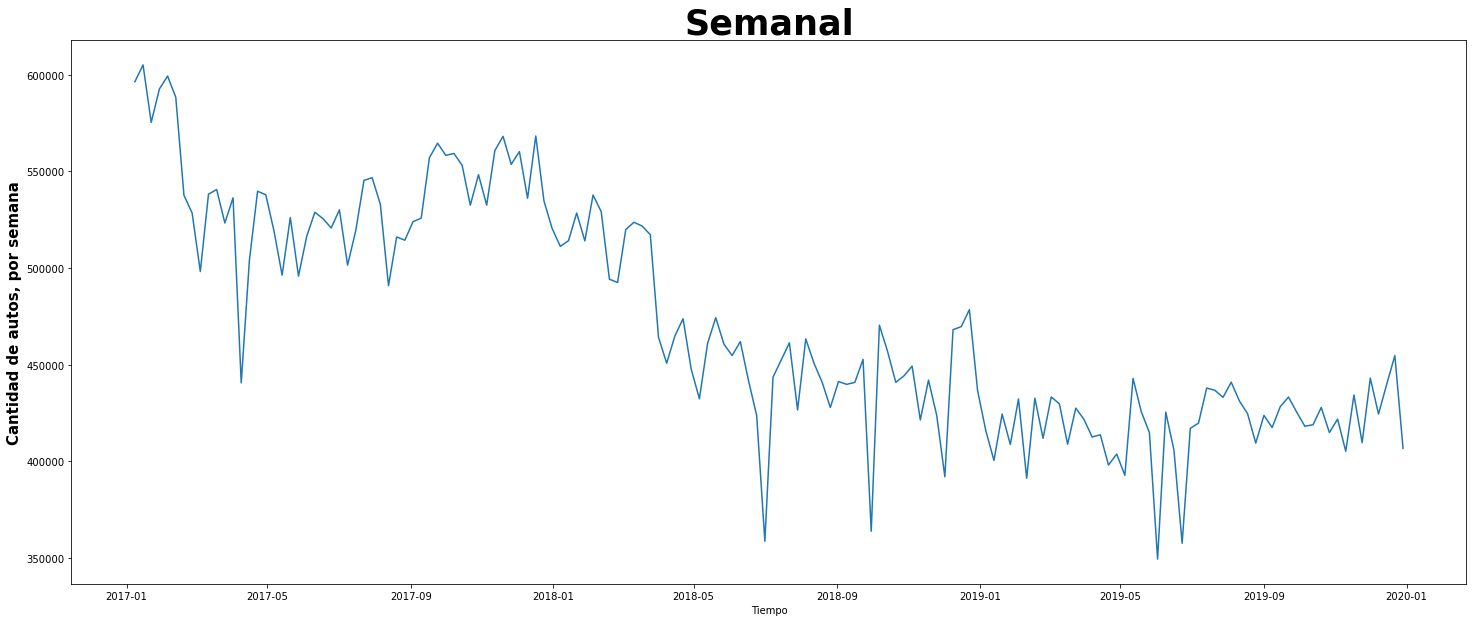

In [54]:
# Grafico la serie
plt.figure(figsize=(25,10))
plt.plot(sema_avell.index, sema_avell.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana' , fontweight = "black" , fontsize = 15)
plt.title("Semanal" , fontweight = "black" , fontsize = 35)

### Conclusiones pregunta original: 

Analizando el comportamiento de la serie para la estacion Avellaneda para el mismo periodo de tiempo con medio de pago efectivo podemos observar una marcada tendencia negativa en cantidad de autos por semana que pagan con efectivo lo cual es llamativo ya que el medio de pago efectivo aumento de 2017 a 2018 y se mantuvo mas o menos constante para 2018. 

Como conclusion entonces podria afirmar que tanto Avellaneda como Illia explican el aumento de cantidad de autos que pagan con efectivo.

# PARTE B: MODELO DE MACHINE LEARNING

## En esta seccion se realizaran las siguientes acciones: 

- Analisis de autorrelacion con el objetivo de poder determinar la importancia de los retardos y su influencia en el valor actual. 

- Tenemos que transformar los datos para crear un dataset que pueda set utilizado como insumo de los modelos. El criterio sera el One-Step de entrenamiento y testeo.

- Entreno un primer modelo de benchmark que es la serie desplazada un periodo y le calculo el RMSE. El objetivo de hacer esto es tener una primer idea de los errores y de entender el peligro de hacer este tipo de justificaciones( decir que los valores de la semana proxima van a ser iguales a los de esta semana).

- Voy a entrenar 3 modelos ( Regresion lineal, Random Forest y Knn) con este nuevo dataset. Al modelo que tenga la mejor metrica le voy a hacer la optimizacion de hiperparametros.

- Una vez que tenga el mejor modelo optimizado ya estoy en condiciones de poder usar para predecir valores futuros.

## Analisis de autocorrelacion

Se puede utilizar para estudiar el tema de estacionaridad. Se calcula como covarianza en el rezago k/ varianza, su valor se encuentra entre -1 y 1.

Es normal que la autocorrelacion vaya decreciendo hasta incluso valores negativos, este decrecimiento indica que la serie no es estacionaria. Siempre el estudio de autocorrelacion refleja el comportamiento real de los datos, o sea que la grafica de autocorrelaciones es el punto de partida para estudiar como los valores de hoy estan influenciados por valores anteriores.

Como los valores van decreciendo tenemos que ver cuales son significativos, para eso utilizo los intervalos de confianza. Este paso se realiza en un segundo grafico.



In [55]:
# Realizamos un analisis de autocorrelacion parcial con 52 unidades de retardo y vemos como estan relacionadas 
nlags =  52   
autocorr = acf(semanal.cantidad_pasos, nlags = nlags)

C:\Users\Luciano\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Por que queda seleccionado el valor 52? basicamente por que el año tiene 52 semanas. Fui probando con diferentes valores pero 52 me parece un numero que contiene toda la informacion del impacto de valores anteriores sobre el actual. Esto se puede ver mejor con el grafico siguiente

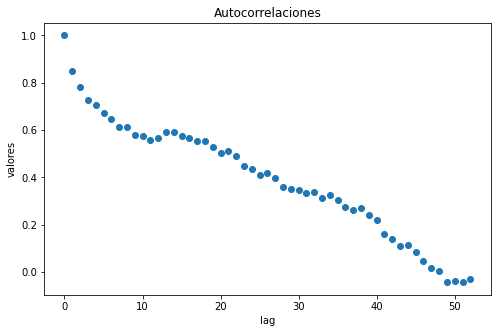

In [56]:
# Grafico de autocorrelaciones
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag') 
plt.ylabel('valores')
plt.title('Autocorrelaciones')
plt.show()

El grafico de autocorrelacion nos permite determinar el grado de impacto de los periodos anteriores sobre el actual, en este caso vemos como cae a medida que pasa el tiempo es decir que el modelo no tiene buena memoria ( lo cual es bueno). Ahora el problema que se presenta es que estos valores no nos dicen hasta que valor de lag son realmente "influyentes" en el valor actual, para poder responder a esta pregunta hacemos un plot de autocorrelacion este plot tiene la particularidad de crear bandas con intervalos de confianza.

<Figure size 1080x576 with 0 Axes>

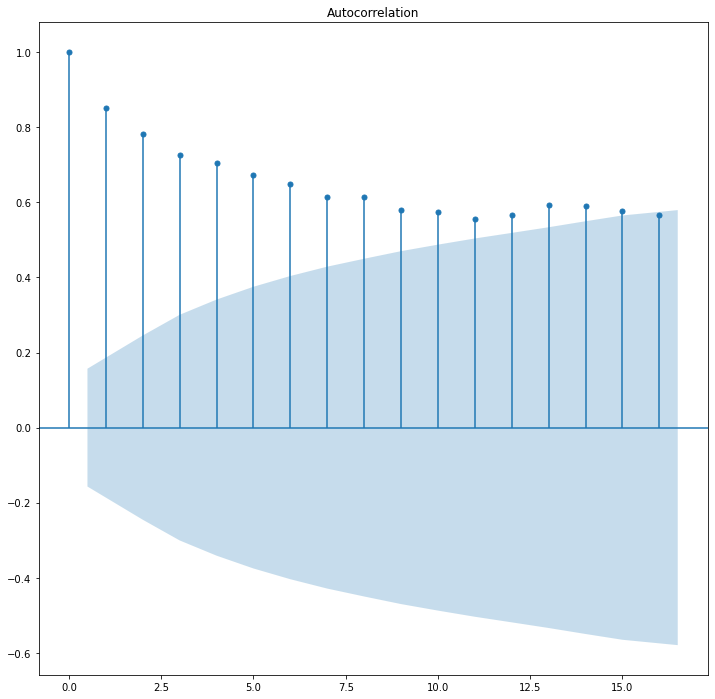

In [57]:
# Grafico de la autocorrelacion con intervalos de confianza
plt.figure(figsize = (15,8))
plot_acf(semanal.cantidad_pasos, lags = 16)

plt.show()

Estoy interesado por todos los lags que esten por fuera de la zona oscura. La zona oscura indica que valores no superan la prueba de significacion, es decir que variables NO son significativas(utiles). Siguiendo con este analisis se observa que hasta el retardo 16 los valores se encuentran por fuera de la zona de confianza.

### Conclusiones de autocorrelacion:

- Los retardos significativos son de 16( es decir que el valor de la semana actual esta influenciada por hasta 16 semanas atras), sera ese valor utilizado para empezar a armar mas adelante el dataset.

- Este grafico permite confirmar que la serie NO es estacionaria, puede servir de punto de partida para el proyecto 4 transformar la serie en estacionaria y crear un modelo ARIMA.

## Creacion del dataset

### One Step Prediction:

In [58]:
# selecciono la columna cantidad_pasos de la granularidad semanal
semanal_autos = semanal.cantidad_pasos
semanal_autos

fecha
2017-01-08    347212.0
2017-01-15    366413.0
2017-01-22    357215.0
2017-01-29    354581.0
2017-02-05    359401.0
                ...   
2019-12-01    266555.0
2019-12-08    282891.0
2019-12-15    272960.0
2019-12-22    292881.0
2019-12-29    292881.0
Freq: W-SUN, Name: cantidad_pasos, Length: 156, dtype: float64

In [59]:
print(f'tipo de datos: {semanal_autos.dtypes}')
print(f'Dimensiones de semanal autos es: {semanal_autos.shape}')

tipo de datos: float64
Dimensiones de semanal autos es: (156,)


In [60]:
# Elijo 16 teniendo en cuenta el analisis de autocorrelacion realizado anteriormente.
look_back = 16 

In [61]:
# Creo una matriz con ceros, va a tener 139 filas, 16 columnas para la variable X y una columna para la variable Y
N = semanal_autos.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)   

(139, 16) (139,)


In [62]:
# Se van rellenando los valores de la matriz a traves de un for que recorre cada fila y va asignandole el valor que antes tenia en la columna lo vuelve fila, la fila siguiente es igual a la anterior pero un periodo mas adelante y asi 
for i in range(X.shape[0]):
    X[i,:] = semanal_autos.iloc[i:i+look_back]
    y[i] = semanal_autos.iloc[i+look_back]

In [63]:
print(X)

[[347212. 366413. 357215. ... 286862. 304912. 342225.]
 [366413. 357215. 354581. ... 304912. 342225. 350946.]
 [357215. 354581. 359401. ... 342225. 350946. 325875.]
 ...
 [274513. 265594. 279775. ... 281790. 264500. 266555.]
 [265594. 279775. 276271. ... 264500. 266555. 282891.]
 [279775. 276271. 272592. ... 266555. 282891. 272960.]]


In [64]:
print(X.shape)

(139, 16)


In [65]:
print(y.shape)

(139,)


### Separacion en train y test

In [117]:
N_train = 140 - look_back 
N_test = 12 
N_total = N_train + N_test   # es aproximadamente el 34% del total de filas, en el notebook usamos alrededor del 20% revisar clase 2

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(124, 16) (124,)
(12, 16) (12,)


Ya tenemos el dataset creado y separado en datos de entrenamiento y testeo, ahora es momento de pasar a los modelos.

## Entrenamiento de modelos: 

### Benchmark con seie desplazada 1 periodo

In [118]:
# Esta serie predicha es simplemente la serie original "trasladada" un periodo mas adelante
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [119]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

9514.844586224202


## Regresion Lineal 

In [120]:
reg2 = LinearRegression()
reg2.fit(X_train, y_train)
y_test_reg2_predi = reg2.predict(X_test)
y_train_reg2_predi = reg2.predict(X_train)

rmse_train_reg2 = np.sqrt(mean_squared_error(y_train , y_train_reg2_predi))
rmse_test_reg2 = np.sqrt( mean_squared_error(y_test , y_test_reg2_predi))
print(f'El error en train Reg es: {rmse_train_reg2}')
print(f'El error en test Reg es: {rmse_test_reg2} ')

El error en train Reg es: 16759.44896935971
El error en test Reg es: 8467.877916371468 


La explicacion de esta diferencia entre train y test tiene que ver con la logitud de los datos, por el lado de train son 124 y por el lado de train son 12, entonces es de esperar que entrene bien.
Ahora con el nuevo dataset en error se redujo, voy a entrenar 2 modelos mas para compararlo con el Bench asi decido el mejor y le hago la optimizacion de hiperparametros.

## Random Forest

In [121]:
# Instancio el objeto y lo entreno sobre X e y
r_f = RandomForestRegressor()
r_f.fit(X_train , y_train)

y_train_rf_pred = r_f.predict(X_train)
y_test_rf_pred = r_f.predict(X_test)

rmse_train_rf = np.sqrt(mean_squared_error(y_train , y_train_rf_pred))
rmse_test_rf = np.sqrt(mean_squared_error(y_test , y_test_rf_pred))
print(f' El error en train de RF es: {rmse_train_rf}')
print(f'El error en test de RF es: {rmse_test_rf}')

 El error en train de RF es: 7251.066858239281
El error en test de RF es: 9332.482439401614


Por ejemplo comparando este modelo con el de regresion lineal, Random Forest es mucho mas consistente tiene un error de train mucho mas bajo que el de la Regresion Lineal y un error de Test similar. Se podria interpretar como un modelo un poquito overfiteado pero la verdad que considero que en unidades muy pequeñas por lo que este modelo esta claramente mejor que el modelo Benchmark y el modelo de Regresion Lineal.

In [122]:
# Importancia que le da el modelo a cada una de las features
r_f.feature_importances_

array([0.02813754, 0.01908578, 0.03808664, 0.03046786, 0.01191062,
       0.00976088, 0.00963784, 0.02028373, 0.02421946, 0.0154741 ,
       0.01988724, 0.02447226, 0.02589699, 0.02183167, 0.07208187,
       0.62876553])

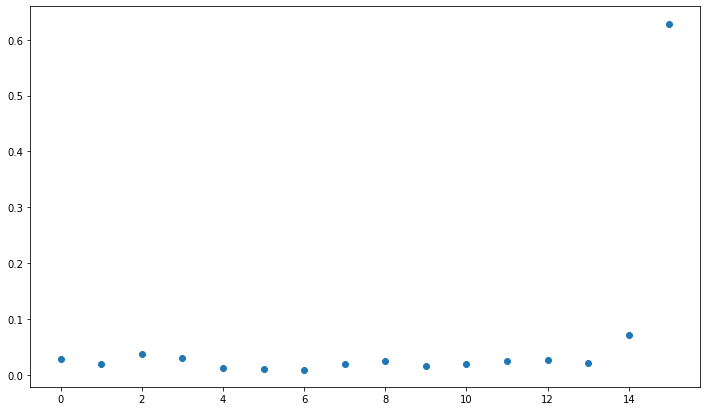

In [123]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(r_f.feature_importances_.size),r_f.feature_importances_)
plt.show()

Podemos ver que el grafico se condice mucho con el grafico de autocorrelacion visto al inicio de esta parte B. En este caso el comportamiento decreciente tambien es evidente, esto quiere decir que la semana anterior es muy importante para predecir el valor de hoy y de ahi va decreciendo hasta 0.10 2 semanas atras y el comportamiento sigue como se observa en el grafico con todos valores inferiores al 0.10

## KNN

In [124]:
# Instancio el objeto, entreno, calculo el error y printeo 
knn = KNeighborsRegressor()
knn.fit(X_train , y_train)  

y_train_knn_predi = knn.predict(X_train)     
y_test_knn_predi = knn.predict(X_test)

rmse_train_knn = np.sqrt(mean_squared_error(y_train , y_train_knn_predi))      # Calculo el rmse del nuevo modelo
rmse_test_knn = np.sqrt(mean_squared_error(y_test , y_test_knn_predi))
print(f"RMSE train modelo mejorado  :   {rmse_train_knn}")
print(f"RMSE test modelo mejorado:   {rmse_test_knn}")

RMSE train modelo mejorado  :   15234.67272999325
RMSE test modelo mejorado:   9503.240346236298


## Resultados modelos sin optimizar:

Mas adelante realizo un comentario y justificacion de que modelo seleccione, hasta el momento Random Forest tiene la mejor performance.

## Aproximacion grafica del mejor modelo

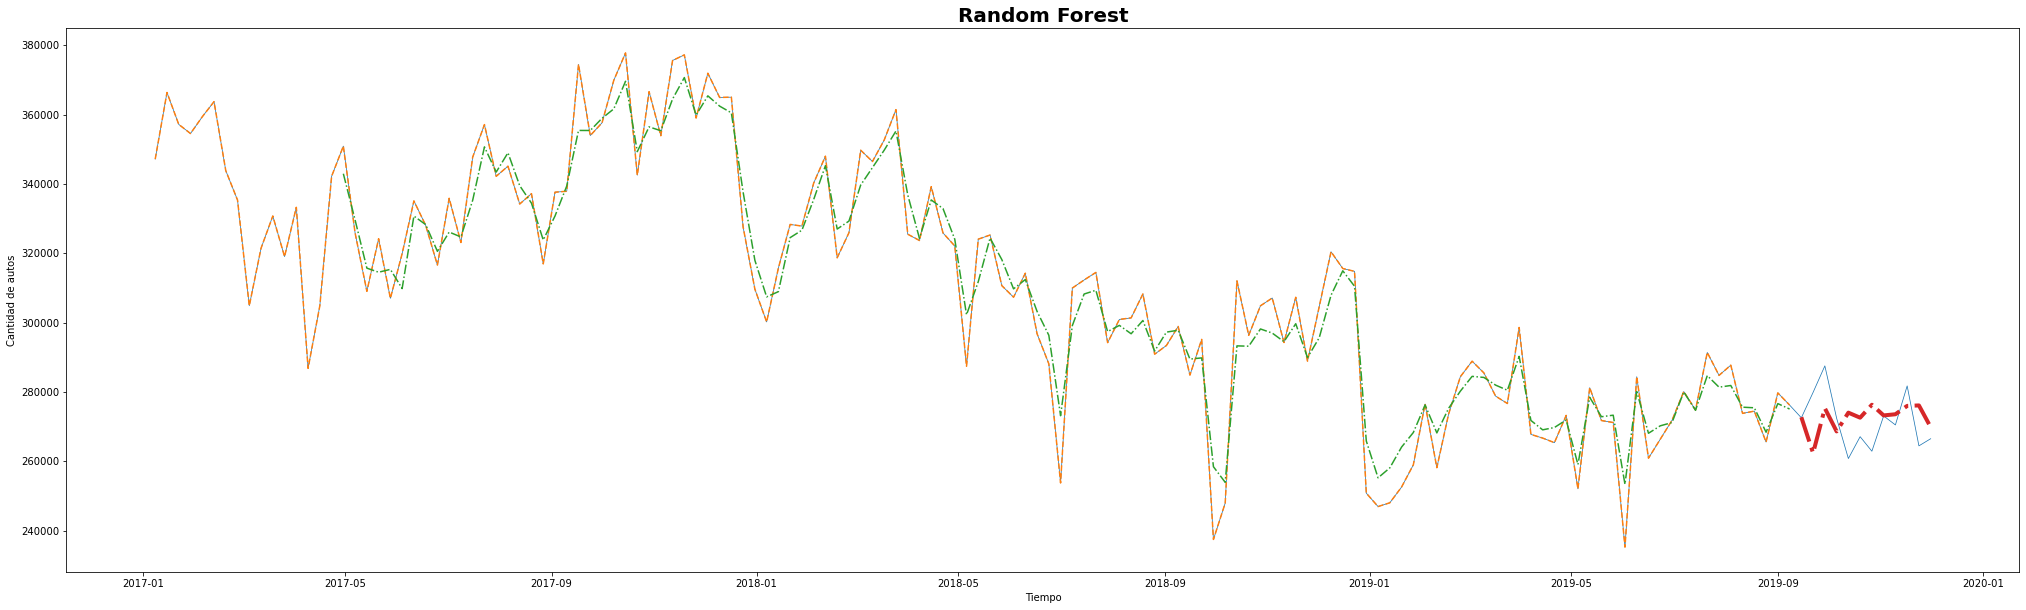

In [128]:
plt.figure(figsize = (35,10))

plt.plot(semanal_autos.index[:length_total], semanal_autos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal_autos.index[:N_train + look_back], semanal_autos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal_autos.index[look_back: look_back + N_train], y_train_rf_pred,'-.',label = 'Predicho en Train')
plt.plot(semanal_autos.index[N_train+look_back: length_total], y_test_rf_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Random Forest',fontweight = "black" , fontsize = 20)

plt.show()

## Conclusiones de modelado:

A traves de este DataFrame se puede ver que el modelo Random Forest tiene la mejor perfomance para esta serie. Tiene en terminos absolutos errores que considero aceptables y una brecha entre train y trest bastante buena. El grafico de features importances ( en este caso serian los periodos anteriores) tiene un comportamiento esperable, la semana anterior a la a predecir tiene una importancia muy significativa para luego seguir decreciendo. Esto tambien puede confirmarse cuando comparo los errores del modelo benchmark( que era justamente desplazar la serie 1 semana) , el benchmark tiene una perfomance muy buena pero opte por el random forest primero por los valores de errores PERO la razon principal es por definicion, me parece que elegir ese modelo benchmark como modelo predictivo es altamente irresponsable entonces el random forest me da mayor respaldo y mayor seguridad a la hora de tener que justificar las metricas o la eleccion del modelo.

Otra forma de entender el buen desempeño del modelo de Random Forest es comparando con el analisis de autocorrelacion. Primero que nada recordando el comportamiento de autocorrelacion, esta iba periodo a periodo disminuyendo de manera monotona, a su vez con el intervalo de confianza fije 16 como los periodos relevantes. Esta conclusion puede ser reforzada cuando estudio el feature importance, si bien no existe una relacion directa y/o perfecta tienen cierta similitud, ambos graficos te llevan a concluir que a medida que pasa el tiempo el grado de importancia de los periodos tiende a bajar lo cual coincide con la hipotesis planteada tanto al inicio del trabajo tanto en el analisis de autocorrelacion.

## Optimizacion de hiperparametros para modelo Random Forest

- Creacion de grilla de parametros a probar

- Instanciar GridSearchCV

- Hacer un fit del modelo

- Obtener los mejores hiperparametros

In [129]:
# Creo la grilla de hiperparametros
grilla = {'n_estimators': [20,40,60,80,100] , 'max_depth': [3,5,10,15,20,30] , 'max_features' : ['auto', 'sqrt'] }

In [132]:
# Instancio el objeto GridSearch hago un CV de 5 para no alargar mucho el tiempo de busqueda
rf_optimizado = GridSearchCV(estimator = r_f , param_grid = grilla , cv = 5 )

In [133]:
# Entreo sobre los datos de train
rf_optimizado.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [134]:
# Obtengo los mejores valores
print("Mejores parametros: "+str(rf_optimizado.best_params_))
print("Mejor Score: "+str(rf_optimizado.best_score_)+'\n')

Mejores parametros: {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 80}
Mejor Score: 0.14447946126798977



Reemplazando los mejores hiperparametros en la estimacion se obtiene lo siguiente: 

In [135]:
# Random Forest Optimizado
rf_opt = RandomForestRegressor(n_estimators = 80 , max_depth = 3 , max_features = 'auto')
rf_opt.fit(X_train , y_train)

y_train_rfopt_pred = rf_opt.predict(X_train)
y_test_rfopt_pred = rf_opt.predict(X_test)


rmse_test_rfopt = np.sqrt(mean_squared_error(y_test , y_test_rfopt_pred))

print(f'El error en test de RF es: {rmse_test_rfopt}')

El error en test de RF es: 8991.616323318649


## Conclusion optimizacion de Hiperparametros:

A traves del GridSearch pude obtener los mejores hiperparametros, con esos hiperparametros calcule el error el test para tener una idea de la mejora con respecto al modelo de random forest original, este tuvo una reduccion del 17% aproximandamente lo cual es muy bueno.

Entonces formalmente el mejor modelo es un Random Forest con n_estimators = 60 , max_depth = 10 , max_features = 'sqrt'.

## Forecast para primer trimestre de 2021

El dataset creado tiene 16 columnas que sirven para predecir la columna 17. Las primeras 124 filas estan dentro de los valores de train, es decir el modelo entrena con 16 valores y predice el 17 este es comparado con el valor original y se obtiene el error. Las ultimas 12 filas sirven para testear el modelo con la misma logica.

Ahora lo que queda pendiente es responder a la pregunta, pronosticar valores nuevo desconocidos. Para hacer esto se parte de la ultima fila de este dataset y se van haciendo predicciones una por una durante 12 iteraciones ( por que voy a pronosticar 3 meses) dando como resultado finalmente una lista con las 12 y predichas por el modelo de Random Forest, luego tengo que comparar estos valores con los y reales y calculo los errores.

Si bien el enunciado me pide hacer un pronostico para todo el año 2020, yo decidi solamente hacerlo sobre los primeros 3 meses ( prepandemia) ya que considero que tienen valores relativamente "normales" si busco aplicar este modelo para todo el año seguramente me va a dar muy malos resultados por el impacto de la pandemia y las medidas restrictivas 

Como estoy realizando un analisis a traves del modelo de One-Step voy a ir generando valores fila por fila, es decir que como quiero predecir 12 valores( 3 meses) voy a realizar un for de 12 iteraciones donde va calculando la ultima "columna" luego descarta el primer valor y es reemplazado por la prediccion anterior y asi sucesivamente.

Al final se llega a una lista que tiene los 12 valores predichos que seran comparados con los 12 valores reales de la serie dada por el dataset original.

In [136]:
nueva_x = X_test[11,:]
forecast = []
for i in range(12):
    predicciones = r_f.predict(nueva_x.reshape(1,-1))
    nueva_x = np.hstack((nueva_x,predicciones))
    nueva_x = nueva_x[1:]
    forecast.append(predicciones[0])

print(forecast)

[269892.865, 274453.865, 275671.27, 272399.635, 275375.98, 275383.915, 276448.185, 274365.155, 275294.52, 273753.63, 274347.83, 273905.175]


In [138]:
predic = pd.DataFrame(forecast , columns = ['Predicciones'])
predic

,Predicciones
0,269892.865
1,274453.865
2,275671.270
3,272399.635
4,275375.980
5,275383.915
6,276448.185
7,274365.155
8,275294.520
9,273753.630


Las siguientes celdas operan de la misma forma que al inicio del notebook, la idea es llegar a la misma granularidad para las primeras 12 semanas del año 2020

In [142]:
# Cargo el dataset del año 2020
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [143]:
df_2020 = data_2020.loc[(data_2020.estacion =='ILLIA')&(data_2020.forma_pago == 'Efectivo')]
# Dropeo las columnas
df_2020 = df_2020[['estacion','fecha','hora_fin','dia','sentido','tipo_vehiculo','cantidad_pasos']]
df_2020.head()

,estacion,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
52,ILLIA,2020-01-01 00:00:00,1.0,Miércoles,Centro,Auto,326.0
53,ILLIA,2020-01-01 00:00:00,1.0,Miércoles,Provincia,Auto,319.0
134,ILLIA,2020-01-01 00:00:00,2.0,Miércoles,Centro,Auto,199.0
135,ILLIA,2020-01-01 00:00:00,2.0,Miércoles,Provincia,Auto,180.0
202,ILLIA,2020-01-01 00:00:00,3.0,Miércoles,Centro,Auto,114.0


In [144]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
df_2020['fecha2'] = pd.to_datetime(df_2020.fecha) + pd.to_timedelta(df_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
df_2020.drop(columns=['fecha','hora_fin'], inplace = True)

df_2020.head()

,estacion,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
52,ILLIA,Miércoles,Centro,Auto,326.0,2020-01-01 01:00:00
53,ILLIA,Miércoles,Provincia,Auto,319.0,2020-01-01 01:00:00
134,ILLIA,Miércoles,Centro,Auto,199.0,2020-01-01 02:00:00
135,ILLIA,Miércoles,Provincia,Auto,180.0,2020-01-01 02:00:00
202,ILLIA,Miércoles,Centro,Auto,114.0,2020-01-01 03:00:00


In [145]:
#Corregimos el nombre de fecha2 a fecha
df_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df_2020.head()

,estacion,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
52,ILLIA,Miércoles,Centro,Auto,326.0,2020-01-01 01:00:00
53,ILLIA,Miércoles,Provincia,Auto,319.0,2020-01-01 01:00:00
134,ILLIA,Miércoles,Centro,Auto,199.0,2020-01-01 02:00:00
135,ILLIA,Miércoles,Provincia,Auto,180.0,2020-01-01 02:00:00
202,ILLIA,Miércoles,Centro,Auto,114.0,2020-01-01 03:00:00


In [146]:
#Reordenamos el dataset por fecha
df_2020.sort_values('fecha', inplace = True)
df_2020.reset_index(drop=True, inplace = True)
df_2020

,estacion,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,ILLIA,Miércoles,Centro,Moto,7.0,2020-01-01 00:00:00
1,ILLIA,Miércoles,Provincia,Auto,423.0,2020-01-01 00:00:00
2,ILLIA,Miércoles,Centro,Auto,467.0,2020-01-01 00:00:00
3,ILLIA,Miércoles,Provincia,Moto,6.0,2020-01-01 00:00:00
4,ILLIA,Miércoles,Centro,Pesados 2 Ejes,1.0,2020-01-01 00:00:00
...,...,...,...,...,...,...
52369,ILLIA,Jueves,Provincia,Auto,222.0,2020-12-31 20:00:00
52370,ILLIA,Jueves,Provincia,Auto,106.0,2020-12-31 21:00:00
52371,ILLIA,Jueves,Centro,Moto,5.0,2020-12-31 21:00:00
52372,ILLIA,Jueves,Provincia,Moto,1.0,2020-12-31 21:00:00


In [147]:
# Resampleo en funcion de las semanas
semanal_2020 = df_2020.resample('W' , on = 'fecha').sum() 
semanal_2020 = semanal_2020.loc[(semanal_2020.index > '2020-01-01')]    # Necesito los 3 primeros meses solamente
semanal_2020 = semanal_2020.loc[(semanal_2020.index <  '2020-04-10')]
print(semanal_2020.shape)
semanal_2020

(14, 1)


,cantidad_pasos
fecha,
2020-01-05,150623.0
2020-01-12,243359.0
2020-01-19,246818.0
2020-01-26,241192.0
2020-02-02,253335.0
2020-02-09,247145.0
2020-02-16,261458.0
2020-02-23,257096.0
2020-03-01,235487.0


In [156]:
# creo un diccionario con todos los elementos asi formo un dataframe con ambas columnas :
valores_2020 = {'fecha_2020': ['2020-01-05','2020-01-12','2020-01-19','2020-01-26','2020-02-02','2020-02-09','2020-02-16','2020-02-23','2020-03-01','2020-03-08','2020-03-15','2020-03-22'] , 'Reales' : [150623.0,243359.0,246818.0,241192.0,253335.0,247145.0,261458.0,257096.0,235487.0,254910.0,222793.0,107855.0], 'Predicho' : [269892.865, 274453.865, 275671.27, 272399.635, 275375.98, 275383.915, 276448.185, 274365.155, 275294.52, 273753.63, 274347.83, 273905.175]}

In [158]:
df_2020 = pd.DataFrame(valores_2020)
df_2020

,fecha_2020,Reales,Predicho
0,2020-01-05,150623.0,269892.865
1,2020-01-12,243359.0,274453.865
2,2020-01-19,246818.0,275671.270
3,2020-01-26,241192.0,272399.635
4,2020-02-02,253335.0,275375.980
5,2020-02-09,247145.0,275383.915
6,2020-02-16,261458.0,276448.185
7,2020-02-23,257096.0,274365.155
8,2020-03-01,235487.0,275294.520
9,2020-03-08,254910.0,273753.630


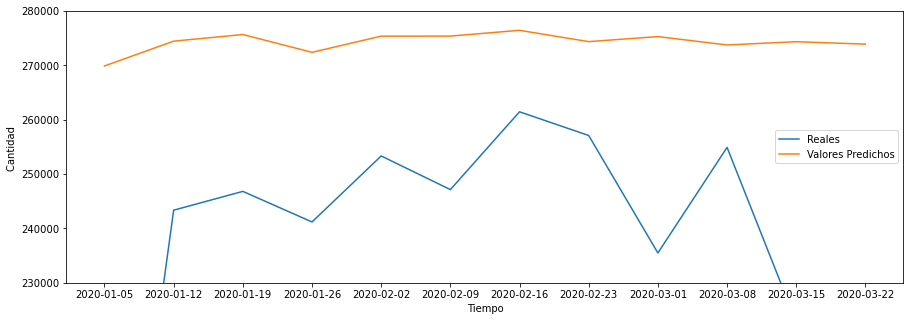

In [162]:
plt.figure(figsize = (15,5))
plt.plot(df_2020.fecha_2020, df_2020.Reales, label = 'Reales')
plt.plot(df_2020.fecha_2020, df_2020.Predicho, label = 'Valores Predichos')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad ')
plt.ylim(230000,280000)          
plt.show()

## Conclusiones parte Forecast:

La idea de esta segunda parte era lograr realizar predicciones para el futuro con valores que se van a obtener de la misma fuente que las anteriores bases de datos. A traves de un Random Forest y One-Step como tecnica fui incorporando lineas con estimaciones y reemplazando en la siguiente y asi sucesivamente al final obtuve 12 valores predichos por el modelo RF. Seguidamente filtre el dataset 2020 segun las mismas caracteristicas que para los años anteriores para finalmente crear un dataframe con las fechas para los 3 meses iniciales, una columna con los valores originales y otra con los valores predichos por el modelo RF.

### ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

La forma de agregar estas nuevas columnas seria a traves de get_dummies, asi podrian transformarse en 1 y 0 y el modelo se nutriria de mas informacion para poder realizar estimaciones. El principal problema que encuentro es conceptual por que en series de tiempo por lo general se hace un analisis de una MISMA variable a traves del tiempo, ahora si queremos agregar nuevas variables explicativas no encuentro la manera tecnica de agregarlas ya que el dataset esta estructurado de una manera determinada( va en orden con 16 columnas y una 17 para las y) y si agregamos variables categoricas con get_dummies estariamos agregando muchas mas columnas. Si esa agregacion de variables categoricas no distorciona o confunde al modelo podria ser una gran idea.

### ¿ Que te gustaria probar?

En el informe 4 voy a aplicar otras tecnicas de forecast ( probablemente ARIMA,redes neuronales y XGBoost) para comparar con las realizadas en este proyecto y ver si obtengo mejores resultados. Si bien los modelos ARIMA son un poco mas complicados por todos los supuestos que piden para poder trabajar, redes neuronales y XGBoost deberian dar mejores resultados ya que actualmente son las tecnicas mas usadas.